In [99]:
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import sqrt

# 
from sklearn.feature_selection import VarianceThreshold

#model metrics
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import classification_report

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# Estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# RFE 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

#Hot encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Association Rules
from apyori import apriori

In [100]:
#https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn
def generate_accuracy_and_heatmap(model, x, y):
    train_predictions = model.predict(x)
    acc = accuracy_score(y, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    class_rep = classification_report(y, train_predictions )
    print("Classification Report:\n {}".format(class_rep))

    cross_val = cross_val_score(model, x, y)
    print("Cross Validation: {}".format(cross_val))

    #score
    score = model.score(x,y)
    print("Score: {}".format(score))

    #Predictions
    train_predictions_proba = model.predict_proba(x)
    ll = log_loss(y_test, train_predictions_proba)
    print("Log Loss: {}".format(ll))

    print ("\n")
    print (pd.crosstab(pd.Series(train_predictions, name='Predicted'),
                       pd.Series(y,name='DEFAULT')))
    return 1

In [101]:
####################################################################################################
##                             1. Import and Prepare the Data                                     ##
####################################################################################################

hcv= pd.read_csv('HCV-Egy-Data/HCV-Egy-Data.csv')

hcv.columns = hcv.columns.str.replace(' ', '')


# Data and Text Cleaning

hcv.rename(columns={"Nausea/Vomting": "NauseaVomting"}, inplace=True)
hcv.rename(columns={"Fatigue&generalizedboneache": "FatigueBoneAche"}, inplace=True)
hcv.rename(columns={"Epigastricpain": "EpigastricPain"}, inplace=True)
hcv.rename(columns={"BaselinehistologicalGrading": "BHSGrading"}, inplace=True)
hcv.rename(columns={"Baselinehistologicalstaging": "BHStaging"}, inplace=True)

hcv['Gender'] = hcv['Gender'].astype('category')
hcv['Fever'] = hcv['Fever'].astype('category')
hcv['NauseaVomting'] = hcv['NauseaVomting'].astype('category')
hcv['Headache'] = hcv['Headache'].astype('category')
hcv['Diarrhea'] = hcv['Diarrhea'].astype('category')
hcv['FatigueBoneAche'] = hcv['FatigueBoneAche'].astype('category')
hcv['Jaundice'] = hcv['Jaundice'].astype('category')
hcv['EpigastricPain'] = hcv['EpigastricPain'].astype('category')
hcv['BHStaging'] = hcv['BHStaging'].astype('category')
hcv['BHSGrading'] = hcv['BHSGrading'].astype('category')

hcv.describe()

,Age,BMI,WBC,RBC,HGB,Plat,AST1,ALT1,ALT4,ALT12,ALT24,ALT36,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF
count,1385.000000,1385.000000,1385.000000,1.385000e+03,1385.000000,1385.00000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1385.000000,1.385000e+03,1.385000e+03,1.385000e+03,1385.000000,1385.000000
mean,46.319134,28.608664,7533.386282,4.422130e+06,12.587726,158348.06065,82.774729,83.916245,83.405776,83.510469,83.709025,83.117690,83.629603,33.438267,5.909512e+05,6.008956e+05,2.887536e+05,287660.336462,291378.290975
std,8.781506,4.076215,2668.220333,3.463577e+05,1.713511,38794.78555,25.993242,25.922800,26.529730,26.064478,26.205994,26.399031,26.223955,7.073569,3.539354e+05,3.623151e+05,2.853507e+05,264559.525070,267700.691713
min,32.000000,22.000000,2991.000000,3.816422e+06,10.000000,93013.00000,39.000000,39.000000,39.000000,39.000000,39.000000,5.000000,5.000000,5.000000,1.100000e+01,5.000000e+00,5.000000e+00,5.000000,5.000000
25%,39.000000,25.000000,5219.000000,4.121374e+06,11.000000,124479.00000,60.000000,62.000000,61.000000,60.000000,61.000000,61.000000,61.000000,28.000000,2.692530e+05,2.708930e+05,5.000000e+00,5.000000,5.000000
50%,46.000000,29.000000,7498.000000,4.438465e+06,13.000000,157916.00000,83.000000,83.000000,82.000000,84.000000,83.000000,84.000000,83.000000,34.000000,5.931030e+05,5.978690e+05,2.343590e+05,251376.000000,244049.000000
75%,54.000000,32.000000,9902.000000,4.721279e+06,14.000000,190314.00000,105.000000,106.000000,107.000000,106.000000,107.000000,106.000000,106.000000,40.000000,8.867910e+05,9.090930e+05,5.248190e+05,517806.000000,527864.000000
max,61.000000,35.000000,12101.000000,5.018451e+06,15.000000,226464.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,45.000000,1.201086e+06,1.201715e+06,3.731527e+06,808450.000000,810333.000000


In [102]:
hcv_raw = hcv.copy() 

hcv_raw['Gender'] = hcv_raw.Gender.astype('category') 
hcv_raw['Fever'] = hcv_raw.Fever.astype('category')
hcv_raw['NauseaVomting'] = hcv_raw.NauseaVomting.astype('category')
hcv_raw['Headache'] = hcv_raw.Headache.astype('category')
hcv_raw['Diarrhea'] = hcv_raw.Diarrhea.astype('category')
hcv_raw['FatigueBoneAche'] = hcv_raw.FatigueBoneAche.astype('category')
hcv_raw['Jaundice'] = hcv_raw.Jaundice.astype('category')
hcv_raw['EpigastricPain'] = hcv_raw.EpigastricPain.astype('category')
hcv_raw['BHStaging'] = hcv_raw.BHStaging.astype('category')
hcv_raw['HGB'] = hcv_raw.HGB.astype('category')
hcv_raw['BHSGrading'] = hcv_raw['BHSGrading'].astype('category')


In [103]:
hcv_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              1385 non-null   int64   
 1   Gender           1385 non-null   category
 2   BMI              1385 non-null   int64   
 3   Fever            1385 non-null   category
 4   NauseaVomting    1385 non-null   category
 5   Headache         1385 non-null   category
 6   Diarrhea         1385 non-null   category
 7   FatigueBoneAche  1385 non-null   category
 8   Jaundice         1385 non-null   category
 9   EpigastricPain   1385 non-null   category
 10  WBC              1385 non-null   int64   
 11  RBC              1385 non-null   float64 
 12  HGB              1385 non-null   category
 13  Plat             1385 non-null   float64 
 14  AST1             1385 non-null   int64   
 15  ALT1             1385 non-null   int64   
 16  ALT4             1385 non-null   float64 


In [104]:
hcv_raw.head()

,Age,Gender,BMI,Fever,NauseaVomting,Headache,Diarrhea,FatigueBoneAche,Jaundice,EpigastricPain,...,ALT36,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BHSGrading,BHStaging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [105]:
#Dependent Variable Training Set (y Training)
#'No default', 'Default'
depVar = hcv_raw['BHStaging']

#features x
X = hcv_raw.iloc[:,0:28]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              1385 non-null   int64   
 1   Gender           1385 non-null   category
 2   BMI              1385 non-null   int64   
 3   Fever            1385 non-null   category
 4   NauseaVomting    1385 non-null   category
 5   Headache         1385 non-null   category
 6   Diarrhea         1385 non-null   category
 7   FatigueBoneAche  1385 non-null   category
 8   Jaundice         1385 non-null   category
 9   EpigastricPain   1385 non-null   category
 10  WBC              1385 non-null   int64   
 11  RBC              1385 non-null   float64 
 12  HGB              1385 non-null   category
 13  Plat             1385 non-null   float64 
 14  AST1             1385 non-null   int64   
 15  ALT1             1385 non-null   int64   
 16  ALT4             1385 non-null   float64 


In [106]:
depVar

0       2
1       2
2       4
3       3
4       1
       ..
1380    4
1381    2
1382    2
1383    3
1384    3
Name: BHStaging, Length: 1385, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [107]:
classifiers = [
   GradientBoostingClassifier(),      
   AdaBoostClassifier(), # 27.0893% AdaBoostClassifier              
   RandomForestClassifier(max_depth=5, n_estimators=50, max_features="auto"),  
    LinearDiscriminantAnalysis(),               
    KNeighborsClassifier(n_neighbors=5),         
    DecisionTreeClassifier(max_depth=5),          

]

In [108]:

#Training Data is divided into two parts: X-train and y_train
#Testing data follows the same rules and contains two sets: X_test and y_test (ground truth)
X_train, X_test, y_train, y_test = train_test_split(X, depVar, test_size=0.25, random_state=123)

# Running all classifiers for all features

for clf in classifiers:
    print("="*60)
    name = clf.__class__.__name__
    print(name)
    clf.fit(X_train, y_train)
    generate_accuracy_and_heatmap(clf, X_test, y_test)
print("="*60)

 

GradientBoostingClassifier
Accuracy: 25.6484%
Classification Report:
               precision    recall  f1-score   support

           1       0.23      0.27      0.25        77
           2       0.27      0.23      0.25        84
           3       0.27      0.26      0.26        94
           4       0.26      0.27      0.26        92

    accuracy                           0.26       347
   macro avg       0.26      0.26      0.26       347
weighted avg       0.26      0.26      0.26       347

Cross Validation: [0.21428571 0.27142857 0.15942029 0.33333333 0.27536232]
Score: 0.2564841498559078
Log Loss: 1.5392024947969274


DEFAULT    1  2   3  4
Predicted             
1          4  5   8  5
2          4  5   5  7
3          3  3   9  8
4          9  9  10  6
AdaBoostClassifier
Accuracy: 27.0893%
Classification Report:
               precision    recall  f1-score   support

           1       0.27      0.26      0.26        77
           2       0.24      0.24      0.24        84


In [ ]:
hcv_dis = hcv.copy()
hcv_dis.info()

In [ ]:
hcv_dis.isnull().values.any()

In [ ]:
hcv_dis['Gender'].describe()

In [58]:


#hcv_dis = hcv.copy() 

# age [0; 32], ]32; 37], ]37; 42],]42; 47], ]47; 52], ]52; 57],]57; 62]
hcv_dis['Age'] = pd.cut(hcv_dis['Age'], bins = [0, 32, 37, 42, 47, 52, 57, 62], labels = False )

#BMI(Body Mass Index)	22:35	[0; 18:5[ [18:5; 25[, [25; 30[, [30; 35[, [35; 40[
hcv_dis['BMI'] = pd.cut(hcv_dis['BMI'], bins = [0, 18, 25, 30, 35, 40], labels = False  )

hcv_dis['Gender'] = hcv_dis['Gender'].replace([1,2],['Male', 'Female'] )
hcv_dis['Fever'] =hcv_dis['Fever'].replace([1,2],['Absent', 'Present'] )
hcv_dis['NauseaVomting'] = hcv_dis['NauseaVomting'].replace([1,2],['Absent', 'Present'] )
hcv_dis['Headache'] = hcv_dis['Headache'].replace([1,2],['Absent', 'Present'] )
hcv_dis['Diarrhea'] = hcv_dis['Diarrhea'].replace([1,2],['Absent', 'Present'] )
hcv_dis['FatigueBoneAche'] = hcv_dis['FatigueBoneAche'].replace([1,2],['Absent', 'Present'] )
hcv_dis['Jaundice'] = hcv_dis['Jaundice'].replace([1,2],['Absent', 'Present'])
hcv_dis['EpigastricPain'] = hcv_dis['EpigastricPain'].replace([1,2],['Absent', 'Present'] )

#HGB	 If (Gender==[Male]):[2; 14[, [14; 17:5], ]17:5; 20]
#If(Gender==[Female]):[2; 12:3[, [12:3; 15:3], ]15:3; 20]

def apply_HGB_bin_string(gender, value):
    cat = ""
    mean = 0
    if gender == 1:
        if value > 2 and value <= 14:
            cat = '(2, 14]'
            mean = 9
        elif value > 14 and value <= 17.5:
            cat = '(14, 17.5]'
            mean = 15.75
        elif value > 17.5 and value <= 20 :
            cat = '(17, 20]'
            mean = 27
    elif gender == 2:
        if value > 2 and value <= 12.3 :
            cat = '(2, 12.3]'
            mean = 7.15
        elif value > 12.3 and value <= 15.3 :
            cat = '(12.3, 15.3]'
            mean = 13.8
        elif value > 15.3 and value <= 20 :
            cat = '(15.3, 20]'
            mean = 17.5
    return mean

hcv_dis['HGB'] = hcv_dis.apply(lambda x: apply_HGB_bin_string(x.Gender, x.HGB), axis=1)
  
 

#WBC [0; 4000[, [4000; 11000[, [11000; 12101]
hcv_dis['WBC'] = pd.cut(hcv_dis['WBC'], bins = [0, 4000, 11000, 12101], labels = False )


#RBC [0; 3000000[, [3000000; 5000000[,[5000000; 5018451]
hcv_dis['RBC'] = pd.cut(hcv_dis['RBC'], bins = [0, 3000000, 5000000, 5018451], labels = False  )

    
        
# Plat(Platelet) [93013; 100000[, [100000; 255000[,[255000; 226465[
hcv_dis['Plat'] = pd.cut(hcv_dis['Plat'], bins = [93013, 100000,  226464, 255000], labels = False  )

#AST1	ALT1	ALT4	ALT12	ALT24	ALT36	ALT48	ALTafter24w	
hcv_dis['AST1'] = pd.cut(hcv_dis['AST1'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALT1'] = pd.cut(hcv_dis['ALT1'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALT4'] = pd.cut(hcv_dis['ALT4'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALT12'] = pd.cut(hcv_dis['ALT12'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALT24'] = pd.cut(hcv_dis['ALT24'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALT36'] = pd.cut(hcv_dis['ALT36'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALT48'] = pd.cut(hcv_dis['ALT48'], bins=[0, 20, 40, 128], labels = False  )
hcv_dis['ALTafter24w'] = pd.cut(hcv_dis['ALTafter24w'], bins=[0, 20, 40, 128] , labels = False )

#RNABase  [0; 5], ]5; 1201086]
hcv_dis['RNABase'] = pd.cut(hcv_dis['RNABase'], bins=[0, 5, 1201086] , labels = False )

#RNA4	[0; 5], ]5; 1201715]
hcv_dis['RNA4'] = pd.cut(hcv_dis['RNA4'], bins=[0, 5, 1201715], labels = False  )



#RNA12	[0; 5], ]5; 3731527]
hcv_dis['RNA12'] = pd.cut(hcv_dis['RNA12'], bins=[0, 5, 3731527], labels = False  )


#RNAEOT	 [0; 5], ]5; 808450]
hcv_dis['RNAEOT'] = pd.cut(hcv_dis['RNAEOT'], bins=[0, 5, 808450], labels = False  )


#RNAEF	[0; 5], ]5; 808450]
hcv_dis['RNAEF'] = pd.cut(hcv_dis['RNAEF'], bins=[0, 5, 808450], labels = False  )


#BHSGrading [1]; [2]; [3]; :::[16]

# [No Fibrosis], [Portal Fibrosis],Staging (Class Label) [Few Septa], [Many Septa], [Cirrhosis]
hcv_dis['BHStaging'] = hcv_dis['BHStaging'].replace([0,1,2,3,4],['No Fibrosis', 'Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis' ])

hcv_dis['Age'] = hcv_dis['Age'].astype('category') 
hcv_dis['BMI'] = hcv_dis['BMI'].astype('category')

hcv_dis['Gender'] = hcv_dis.Gender.astype('category') 
hcv_dis['Fever'] = hcv_dis.Fever.astype('category')
hcv_dis['NauseaVomting'] = hcv_dis.NauseaVomting.astype('category')
hcv_dis['Headache'] = hcv_dis.Headache.astype('category')
hcv_dis['Diarrhea'] = hcv_dis.Diarrhea.astype('category')
hcv_dis['FatigueBoneAche'] = hcv_dis.FatigueBoneAche.astype('category')
hcv_dis['Jaundice'] = hcv_dis.Jaundice.astype('category')
hcv_dis['EpigastricPain'] = hcv_dis.EpigastricPain.astype('category')
hcv_dis['BHStaging'] = hcv_dis.BHStaging.astype('category')
hcv_dis['HGB'] = hcv_dis.HGB.astype('category')

hcv_dis['WBC'] = hcv_dis.WBC.astype('category')
hcv_dis['RBC'] = hcv_dis.RBC.astype('category')
hcv_dis['Plat'] = hcv_dis.Plat.astype('category')
hcv_dis['AST1'] = hcv_dis.AST1.astype('category')
hcv_dis['ALT1'] = hcv_dis.ALT1.astype('category')
hcv_dis['ALT4'] = hcv_dis.ALT4.astype('category')

hcv_dis['ALT12'] = hcv_dis.ALT12.astype('category')
hcv_dis['ALT24'] = hcv_dis.ALT24.astype('category')
hcv_dis['ALT36'] = hcv_dis.ALT36.astype('category')
hcv_dis['ALT48'] = hcv_dis.ALT48.astype('category')
hcv_dis['ALTafter24w'] = hcv_dis.ALTafter24w.astype('category')
hcv_dis['RNABase'] = hcv_dis.RNABase.astype('category')

hcv_dis['RNA4'] = hcv_dis.RNA4.astype('category')
hcv_dis['RNA12'] = hcv_dis.RNA12.astype('category')
hcv_dis['RNAEOT'] = hcv_dis.RNAEOT.astype('category')
hcv_dis['RNAEF'] = hcv_dis.RNAEF.astype('category')




#hcv_dis['Gender'] = hcv_dis['Gender'].astype('category')

In [60]:
hcv_dis.head()

,Age,Gender,BMI,Fever,NauseaVomting,Headache,Diarrhea,FatigueBoneAche,Jaundice,EpigastricPain,...,ALT36,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BHSGrading,BHStaging
0,0.0,Male,0,Present,Absent,Absent,Absent,Present,Present,Present,...,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,13,Few Septa
1,0.0,Male,0,Absent,Present,Present,Absent,Present,Present,Absent,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,4,Few Septa
2,0.0,Male,0,Present,Present,Present,Present,Absent,Absent,Absent,...,NaN,NaN,NaN,0,0.0,NaN,0.0,0.0,4,Cirrhosis
3,0.0,Female,0,Absent,Present,Absent,Present,Absent,Present,Absent,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,10,Many Septa
4,0.0,Male,0,Absent,Absent,Present,Absent,Present,Present,Present,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,11,Portal Fibrosis


In [41]:
# TODO: create a LabelEncoder object and fit it to each feature in X
# import preprocessing from sklearn
from sklearn import preprocessing
X = hcv_dis.iloc[:,0:28]


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = X.apply(le.fit_transform)
X_2.head()



,Age,Gender,BMI,Fever,NauseaVomting,Headache,Diarrhea,FatigueBoneAche,Jaundice,EpigastricPain,...,ALT24,ALT36,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BHSGrading
0,5,1,2,1,0,0,0,1,1,1,...,1,0,0,0,0,1,1,0,0,10
1,3,1,1,0,1,1,0,1,1,0,...,1,2,2,2,0,1,1,1,1,1
2,5,1,2,1,1,1,1,0,0,0,...,1,0,0,0,0,1,0,1,1,1
3,4,0,2,0,1,0,1,0,1,0,...,1,2,2,1,0,1,1,1,1,7
4,6,1,2,0,0,1,0,1,1,1,...,1,2,2,1,0,1,1,1,1,8


In [78]:
hcv_dis.isnull().values.any()

True

In [43]:
hcv_dis.head()

,Age,Gender,BMI,Fever,NauseaVomting,Headache,Diarrhea,FatigueBoneAche,Jaundice,EpigastricPain,...,ALT36,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BHSGrading,BHStaging
0,5,Male,3,Present,Absent,Absent,Absent,Present,Present,Present,...,0,0,0,1,1,1,0,0.0,13,2
1,3,Male,2,Absent,Present,Present,Absent,Present,Present,Absent,...,2,2,2,1,1,1,1,1.0,4,2
2,5,Male,3,Present,Present,Present,Present,Absent,Absent,Absent,...,0,0,0,1,1,0,1,1.0,4,4
3,4,Female,3,Absent,Present,Absent,Present,Absent,Present,Absent,...,2,2,1,1,1,1,1,1.0,10,3
4,6,Male,3,Absent,Absent,Present,Absent,Present,Present,Present,...,2,2,1,1,1,1,1,1.0,11,1


In [44]:
hcv_dis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              1385 non-null   category
 1   Gender           1385 non-null   category
 2   BMI              1385 non-null   category
 3   Fever            1385 non-null   category
 4   NauseaVomting    1385 non-null   category
 5   Headache         1385 non-null   category
 6   Diarrhea         1385 non-null   category
 7   FatigueBoneAche  1385 non-null   category
 8   Jaundice         1385 non-null   category
 9   EpigastricPain   1385 non-null   category
 10  WBC              1385 non-null   category
 11  RBC              1385 non-null   category
 12  HGB              1385 non-null   category
 13  Plat             1384 non-null   category
 14  AST1             1385 non-null   category
 15  ALT1             1385 non-null   category
 16  ALT4             1385 non-null   category


In [49]:
#One hot Encoding

#X = allFeatures
cat_columns = ['Age', 'Gender', 'BMI',  'Fever', 'NauseaVomting', 'Headache', 'Diarrhea', 'FatigueBoneAche', 
               'Jaundice', 'EpigastricPain', 'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 
               'ALT24', 'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT', 'RNAEF',
               'BHStaging', 'BHSGrading'  ]


ohe_classifiers = [
    GradientBoostingClassifier(max_depth=2),      
    AdaBoostClassifier(),             
    RandomForestClassifier(max_depth=2, n_estimators=50, max_features="auto"),  
    LinearDiscriminantAnalysis(),                 
    KNeighborsClassifier(n_neighbors=4),         
    DecisionTreeClassifier(max_depth=2),          
]

In [50]:
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape

(1385, 80)

In [129]:
onehotlabels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
# # use when different features need different preprocessing
# from sklearn.compose import make_column_transformer
# col_transformer = make_column_transformer(
#         (OneHotEncoder(drop='first'), cat_columns),
#         remainder='passthrough')

# X_ohe = col_transformer.fit_transform(onehotlabels)
# X_ohe

# #Dependent Variable Training Set (y Training)
depVar = hcv_dis['BHStaging']

#Training Data is divided into two parts: X-train and y_train
#Testing data follows the same rules and contains two sets: X_test and y_test (ground truth)
X_train_ohe, X_test_ohe, Y_train_ohe, Y_test_ohe = train_test_split(onehotlabels, depVar, test_size=0.25, random_state=123)


In [52]:
for clf in ohe_classifiers:
    print("="*60)
    name = clf.__class__.__name__
    print(name)
    clf.fit(X_train_ohe, Y_train_ohe)
    generate_accuracy_and_heatmap(clf, X_test_ohe, Y_test_ohe)
print("="*60)

GradientBoostingClassifier
Accuracy: 25.9366%
Classification Report:
               precision    recall  f1-score   support

           1       0.24      0.21      0.22        77
           2       0.20      0.19      0.20        84
           3       0.31      0.31      0.31        94
           4       0.27      0.32      0.29        92

    accuracy                           0.26       347
   macro avg       0.26      0.26      0.25       347
weighted avg       0.26      0.26      0.26       347

Cross Validation: [0.2        0.22857143 0.31884058 0.33333333 0.28985507]
Score: 0.25936599423631124
Log Loss: 1.4398987035973398


DEFAULT    1  2   3   4
Predicted              
1          6  3   4   4
2          5  7   5   7
3          1  7  12   4
4          8  5  11  11
AdaBoostClassifier
Accuracy: 25.0720%
Classification Report:
               precision    recall  f1-score   support

           1       0.21      0.19      0.20        77
           2       0.20      0.21      0.21    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
#Dependent Variable Training Set (y Training)
#'No default', 'Default'
depVar = hcv_dis['BHStaging']

#features x
X = hcv_dis.iloc[:,0:28]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1385 entries, 0 to 1384
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Age              1335 non-null   float64 
 1   Gender           1385 non-null   category
 2   BMI              1385 non-null   int64   
 3   Fever            1385 non-null   category
 4   NauseaVomting    1385 non-null   category
 5   Headache         1385 non-null   category
 6   Diarrhea         1385 non-null   category
 7   FatigueBoneAche  1385 non-null   category
 8   Jaundice         1385 non-null   category
 9   EpigastricPain   1385 non-null   category
 10  WBC              1232 non-null   float64 
 11  RBC              1385 non-null   int64   
 12  HGB              1385 non-null   category
 13  Plat             0 non-null      float64 
 14  AST1             1385 non-null   int64   
 15  ALT1             1385 non-null   int64   
 16  ALT4             1385 non-null   int64   


In [143]:
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


#target = 'DEFAULT'
#X = defaultCredit.loc[:, defaultCredit.columns != target]
#y = defaultCredit.loc[:, defaultCredit.columns == target]
y = hcv_raw['BHStaging']
X = hcv_raw.iloc[:,0:28]

#X.shape

# define dataset
#X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [10, 100]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [4, 6, 8]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

########## Best model
#Best: 0.266686 using {'learning_rate': 0.001, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}

Best: 0.266686 using {'learning_rate': 0.001, 'max_depth': 8, 'n_estimators': 100, 'subsample': 0.5}
0.261370 (0.002542) with: {'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 10, 'subsample': 0.5}
0.261370 (0.002542) with: {'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 10, 'subsample': 0.7}
0.261851 (0.003908) with: {'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 10, 'subsample': 1.0}
0.256781 (0.024353) with: {'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}
0.255601 (0.019298) with: {'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.7}
0.253880 (0.027714) with: {'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
0.261132 (0.002597) with: {'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 10, 'subsample': 0.5}
0.261370 (0.002542) with: {'learning_rate': 0.001, 'max_depth': 6, 'n_estimators': 10, 'subsample': 0.7}
0.261123 (0.010798) with: {'learning_rate': 0.001, 'max_

In [61]:
#################### RFE - Run to get importance and use only the one with higher importance
target = 'BHStaging'
X = hcv_raw.loc[:,   hcv.columns != target]
Y = hcv_raw.loc[:, hcv.columns == target]
clf = RandomForestClassifier(max_depth=10, n_estimators=50, max_features=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [62]:
rfecv = RFECV(estimator=clf, step=3, cv=10, scoring='accuracy')
rfecv = rfecv.fit(x_train, np.ravel(y_train))


In [63]:
print('Optimal number of features: ',rfecv.n_features_)
print('Best features: ', x_train.columns[rfecv.support_])


Optimal number of features:  28
Best features:  Index(['Age', 'Gender', 'BMI', 'Fever', 'NauseaVomting', 'Headache',
       'Diarrhea', 'FatigueBoneAche', 'Jaundice', 'EpigastricPain', 'WBC',
       'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 'ALT24', 'ALT36',
       'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT', 'RNAEF',
       'BHSGrading'],
      dtype='object')


In [64]:
x_train_rfecv = rfecv.transform(x_train)
x_test_rfecv = rfecv.transform(x_test)

print(x_train_rfecv)

[[51 2 23 ... 229824 438732 14]
 [61 2 24 ... 346081 693440 6]
 [35 2 23 ... 404314 477719 16]
 ...
 [33 2 31 ... 5 5 5]
 [32 1 34 ... 431643 574003 12]
 [59 2 35 ... 185799 363462 14]]


In [65]:
rfecv_model = clf.fit(x_train_rfecv, np.ravel(y_train))
generate_accuracy_and_heatmap(rfecv_model, x_test_rfecv, np.ravel(y_test))

Accuracy: 24.4957%
Classification Report:
               precision    recall  f1-score   support

           1       0.22      0.23      0.23        77
           2       0.25      0.19      0.22        84
           3       0.26      0.22      0.24        94
           4       0.25      0.33      0.28        92

    accuracy                           0.24       347
   macro avg       0.25      0.24      0.24       347
weighted avg       0.25      0.24      0.24       347

Cross Validation: [0.22857143 0.34285714 0.28985507 0.33333333 0.30434783]
Score: 0.24495677233429394
Log Loss: 1.4094585425330721


DEFAULT     1   2   3   4
Predicted                
1          18  16  23  25
2          11  16  15  21
3          18  25  21  16
4          30  27  35  30


1

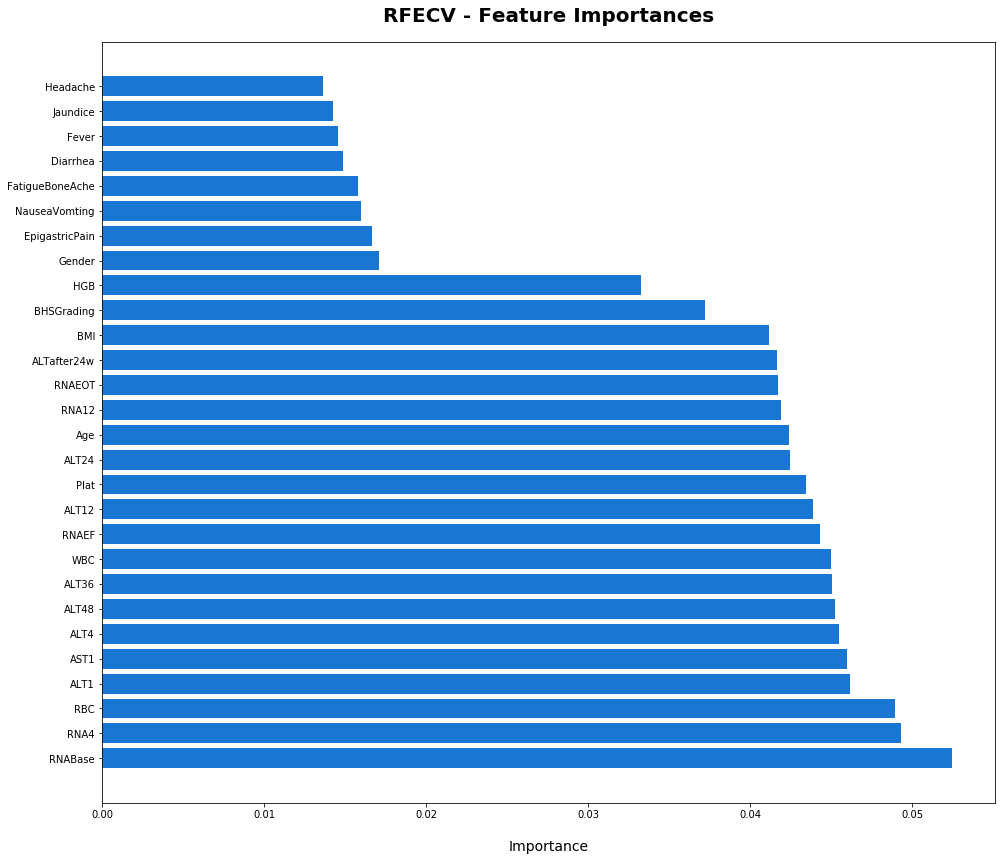

In [66]:
dset = pd.DataFrame()
dset['attr'] = x_train.columns[np.where(rfecv.support_ == True)[0]]
dset['importance'] = rfecv.estimator_.feature_importances_
dset = dset.sort_values(by='importance', ascending=False)
dset

plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [67]:
dset

,attr,importance
22,RNABase,0.052465
23,RNA4,0.049330
11,RBC,0.048941
15,ALT1,0.046174
14,AST1,0.045966
16,ALT4,0.045454
20,ALT48,0.045221
19,ALT36,0.045051
10,WBC,0.044985
26,RNAEF,0.044327


In [68]:
hcv_dis

,Age,Gender,BMI,Fever,NauseaVomting,Headache,Diarrhea,FatigueBoneAche,Jaundice,EpigastricPain,...,ALT36,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BHSGrading,BHStaging
0,0.0,Male,0,Present,Absent,Absent,Absent,Present,Present,Present,...,NaN,NaN,NaN,0,0.0,0.0,NaN,NaN,13,Few Septa
1,0.0,Male,0,Absent,Present,Present,Absent,Present,Present,Absent,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,4,Few Septa
2,0.0,Male,0,Present,Present,Present,Present,Absent,Absent,Absent,...,NaN,NaN,NaN,0,0.0,NaN,0.0,0.0,4,Cirrhosis
3,0.0,Female,0,Absent,Present,Absent,Present,Absent,Present,Absent,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,10,Many Septa
4,0.0,Male,0,Absent,Absent,Present,Absent,Present,Present,Present,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,11,Portal Fibrosis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1380,0.0,Male,0,Absent,Present,Present,Present,Absent,Absent,Absent,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,15,Cirrhosis
1381,0.0,Male,0,Absent,Present,Present,Absent,Absent,Absent,Absent,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,10,Few Septa
1382,0.0,Male,0,Present,Present,Absent,Absent,Absent,Present,Absent,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,6,Few Septa
1383,0.0,Male,0,Present,Absent,Absent,Present,Present,Present,Absent,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,15,Many Septa


In [69]:
cat_columns = ['Age',  'BMI',  
               'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 
               'ALT24', 'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT', 'RNAEF',
               'BHStaging', 'BHSGrading']

data = hcv_dis.drop(['Jaundice', 'Fever', 'Diarrhea', 'EpigastricPain', 'Headache', 'FatigueBoneAche', 'NauseaVomting', 'Gender' ], axis = 1) 

#'No Fibrosis', 'Portal Fibrosis', 'Few Septa', 'Many Septa', 'Cirrhosis' 
dataPF = data[data['BHStaging'] == 'Portal Fibrosis']
dataFS = data[data['BHStaging'] == 'Few Septa']
dataMS = data[data['BHStaging'] == 'Many Septa']
dataC = data[data['BHStaging'] == 'Cirrhosis']
#data = hcv_dis.loc[:, hcv.columns == cat_columns]



In [74]:
dataPF.head()

,Age,BMI,WBC,RBC,HGB,Plat,AST1,ALT1,ALT4,ALT12,...,ALT36,ALT48,ALTafter24w,RNABase,RNA4,RNA12,RNAEOT,RNAEF,BHSGrading,BHStaging
4,0.0,0,NaN,0,0,NaN,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,11,Portal Fibrosis
11,0.0,0,0.0,0,0,NaN,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,16,Portal Fibrosis
12,0.0,0,0.0,0,0,NaN,0,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,8,Portal Fibrosis
15,0.0,0,0.0,0,0,NaN,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,15,Portal Fibrosis
21,0.0,0,0.0,0,0,NaN,0,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,4,Portal Fibrosis


In [75]:
dummies = pd.get_dummies(dataPF,columns=cat_columns)
dummies.head()

,Age_0.0,BMI_0,WBC_0.0,RBC_0,HGB_0,AST1_0,ALT1_0,ALT4_0,ALT12_0,ALT24_0,...,BHSGrading_7,BHSGrading_8,BHSGrading_9,BHSGrading_10,BHSGrading_11,BHSGrading_12,BHSGrading_13,BHSGrading_14,BHSGrading_15,BHSGrading_16
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,1,0,0,0,0,0
11,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
12,1,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
15,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
21,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
######## mlxtend for association rules: Test

import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemsets = apriori(dummies, min_support=0.6, use_colnames=True)
frequent_itemsets

In [77]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

KeyboardInterrupt: 

In [ ]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.8) ]

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

frq_items = apriori(basket_Por, min_support = 0.05, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head()) 

In [98]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from skrules import SkopeRules
from sklearn.metrics import precision_recall_curve

feature_names = ['Age',  'BMI',  
               'WBC', 'RBC', 'HGB', 'Plat', 'AST1', 'ALT1', 'ALT4', 'ALT12', 
               'ALT24', 'ALT36', 'ALT48', 'ALTafter24w', 'RNABase', 'RNA4', 'RNA12', 'RNAEOT', 'RNAEF',
                'BHSGrading', 'Jaundice', 'Fever', 'Diarrhea', 'EpigastricPain', 'Headache', 'FatigueBoneAche', 'NauseaVomting', 'Gender' ]

#dataset = hcv_dis.drop(['Jaundice', 'Fever', 'Diarrhea', 'EpigastricPain', 'Headache', 'FatigueBoneAche', 'NauseaVomting', 'Gender' ], axis = 1) 
#feature_names = data.drop(['Name', 'Preferred_Positions'], axis=1).columns.tolist()
target = 'BHStaging'
X = hcv_dis.loc[:, hcv_dis.columns != target]
Y = hcv_dis.loc[:, hcv_dis.columns == target]
#clf = RandomForestClassifier(max_depth=10, n_estimators=50, max_features=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)



skope_rules_clf = SkopeRules(feature_names=feature_names, random_state=42, n_estimators=30,
                               recall_min=0.05, precision_min=0.9,
                               max_samples=0.7,
                               max_depth_duplication= 4, max_depth = 5)
skope_rules_clf.fit(X_train, y_train)


# Compute prediction scores
# gradient_boost_scoring = gradient_boost_clf.predict_proba(X_test)[:, 1]
# random_forest_scoring = random_forest_clf.predict_proba(X_test)[:, 1]
# decision_tree_scoring = decision_tree_clf.predict_proba(X_test)[:, 1]

skope_rules_scoring = skope_rules_clf.score_top_rules(X_test)

print(str(len(skope_rules_clf.rules_)) + ' rules have been built with ' +
      'SkopeRules.\n')


for i_rule, rule in enumerate(skope_rules_clf.rules_[:4]):
    print(rule[0])
   



ValueError: could not convert string to float: 'Female'

In [102]:
############## Appling Association Rules  -- Appriori Test
# Association Rules
from apyori import apriori
association_rules = apriori(hcv_dis, min_support=0.09, min_confidence=0.7, min_lift=4, min_length=3,  max_length=5)
association_results = list(association_rules)

In [103]:
print(len(association_results))

44


In [104]:
print(association_results[5])

RelationRecord(items=frozenset({'N', 'R', 'A'}), support=0.1724137931034483, ordered_statistics=[OrderedStatistic(items_base=frozenset({'N'}), items_add=frozenset({'R', 'A'}), confidence=0.8333333333333334, lift=4.833333333333333), OrderedStatistic(items_base=frozenset({'R'}), items_add=frozenset({'N', 'A'}), confidence=0.8333333333333334, lift=4.833333333333333), OrderedStatistic(items_base=frozenset({'N', 'A'}), items_add=frozenset({'R'}), confidence=1.0, lift=4.833333333333333), OrderedStatistic(items_base=frozenset({'R', 'A'}), items_add=frozenset({'N'}), confidence=1.0, lift=4.833333333333333)])


In [105]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: N -> R
Support: 0.1724137931034483
Confidence: 0.8333333333333334
Lift: 4.027777777777778
Rule: i -> u
Support: 0.10344827586206896
Confidence: 1.0
Lift: 4.142857142857142
Rule: n -> u
Support: 0.10344827586206896
Confidence: 1.0
Lift: 4.142857142857142
Rule: T -> 2
Support: 0.10344827586206896
Confidence: 1.0
Lift: 4.142857142857142
Rule: T -> 4
Support: 0.13793103448275862
Confidence: 1.0
Lift: 4.142857142857142
Rule: N -> R
Support: 0.1724137931034483
Confidence: 0.8333333333333334
Lift: 4.833333333333333
Rule: i -> B
Support: 0.10344827586206896
Confidence: 1.0
Lift: 4.142857142857142
Rule: B -> g
Support: 0.10344827586206896
Confidence: 1.0
Lift: 4.142857142857142
Rule: i -> B
Support: 0.10344827586206896
Confidence: 1.0
Lift: 4.142857142857142
Rule: e -> h
Support: 0.10344827586206896
Confidence: 1.0
Lift: 4.142857142857142
Rule: u -> e
Support: 0.10344827586206896
Confidence: 1.0
Lift: 4.142857142857142
Rule: i -> g
Support: 0.1724137931034483
Confidence: 0.714285714285714